In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [9]:
read = pd.read_pickle('../Pickle/read.pkl')

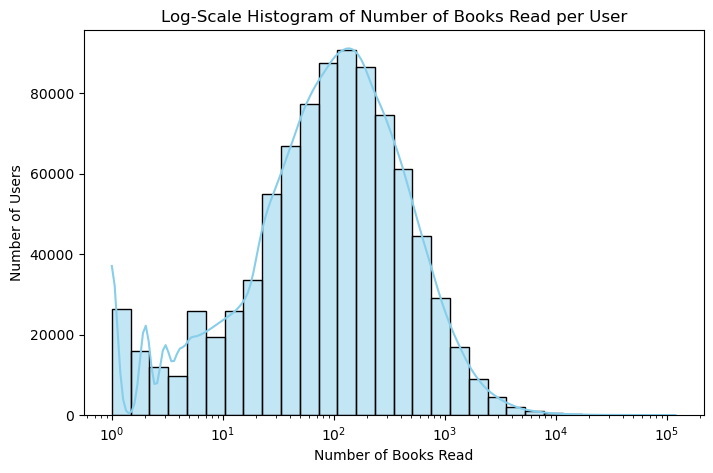

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of books read per user
books_per_user = read.groupby('user_id').size()

# Plot histogram with log scale
plt.figure(figsize=(8, 5))
sns.histplot(books_per_user, bins=30, kde=True, log_scale=True, color='skyblue')

# Add titles and labels
plt.title('Log-Scale Histogram of Number of Books Read per User')
plt.xlabel('Number of Books Read')
plt.ylabel('Number of Users')

plt.show()


In [ ]:
read['is_read'].value_counts()

is_read
0    116517139
1    112131203
Name: count, dtype: int64

In [5]:
# Filter out rows where 'is_read' is 0
read = read[read['is_read'] == 1]

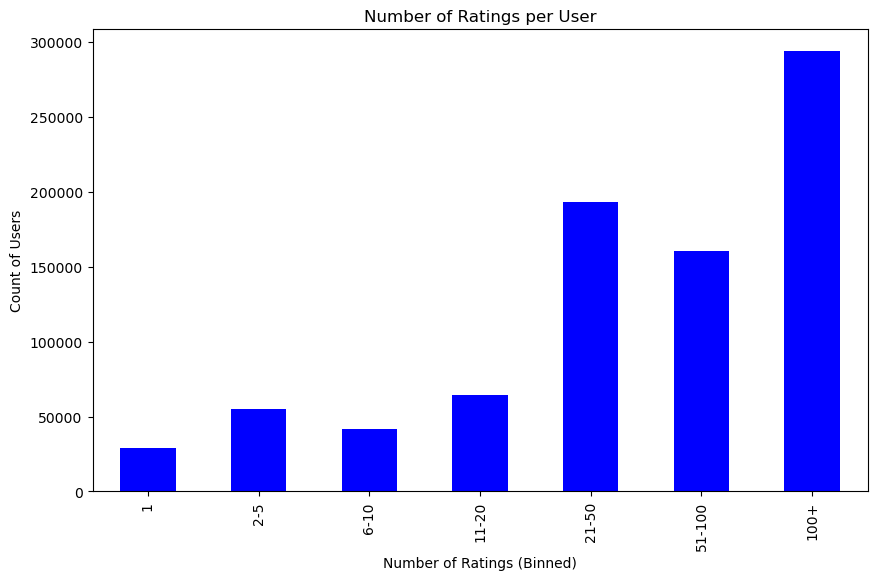

In [7]:
# Count the number of reviews per user
rating_counts = read['user_id'].value_counts()

# Bin the data
bins = [0, 1, 5, 10, 20, 50, 100, rating_counts.max()]
labels = ['1', '2-5', '6-10', '11-20', '21-50', '51-100', '100+']
review_counts_binned = pd.cut(rating_counts, bins=bins, labels=labels, include_lowest=True)

# Create a bar plot of the binned data
plt.figure(figsize=(10, 6))
review_counts_binned.value_counts(sort=False).plot(kind='bar', color='blue')

# Add titles and labels
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings (Binned)')
plt.ylabel('Count of Users')

# Show the plot
plt.show()

In [ ]:
#books = pd.read_pickle('../Pickle/books.pkl')

In [ ]:
reviews = pd.read_pickle('../Pickle/reviews.pkl')

In [ ]:
# Count the number of reviews per user
review_counts = reviews['user_id'].value_counts()

# Bin the data
bins = [0, 1, 5, 10, 20, 50, 100, review_counts.max()]
labels = ['1', '2-5', '6-10', '11-20', '21-50', '51-100', '100+']
review_counts_binned = pd.cut(review_counts, bins=bins, labels=labels, include_lowest=True)

# Create a bar plot of the binned data
plt.figure(figsize=(10, 6))
review_counts_binned.value_counts(sort=False).plot(kind='bar', color='blue')

# Add titles and labels
plt.title('Number of Reviews per User')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Count of Users')

# Show the plot
plt.show()

In [ ]:
interactions = pd.read_pickle('../Pickle/interactions.pkl')

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=read, palette='viridis')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=interactions, palette='viridis')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
books['filtered_genres'] = books['filtered_genres'].apply(lambda x: x.split(', '))
genre_list = [genre for genres in books['filtered_genres'] for genre in genres]
genre_counts = pd.Series(genre_list).value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
print(genre_counts)

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Number of Books')
plt.ylabel('Genres')
plt.show()

In [ ]:
# Set up the plot
plt.figure(figsize=(8, 8))
plt.pie(genre_counts['Count'], labels=genre_counts['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(genre_counts)))
plt.title('Genre Distribution')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.violinplot(x=reviews['n_votes'])

plt.title('Violin Plot of Number of Votes for Reviews')
plt.xlabel('Number of Votes')

plt.show()


In [ ]:
reviews['review_length'] = reviews['review_text'].progress_apply(len)
correlation_df = reviews[['rating', 'n_votes', 'review_length', 'n_comments']]
corr_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', cbar=True)
plt.title('Correlation Matrix')
plt.show()
